# Model training, parameter tuning and evaluation

In [27]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## Load datasets

In [28]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Define and run the Grid Search

In [29]:
model = SVC()
pipeline = Pipeline([('model', model)])

param_grid_svc = {
    'model': [SVC(random_state=42)],
    'model__kernel': ['linear', 'poly', 'rbf'],
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__gamma': ['scale', 'auto'],
    }

param_grid_rf = {
    'model': [RandomForestClassifier(random_state=42)],
    'model__n_estimators': [10, 100, 1000],
    'model__max_features': ['sqrt', 'log2'],
    'model__max_depth': [2, 4, 6, 8, 10],
    'model__criterion': ['gini', 'entropy'],
    }

param_grid = [param_grid_svc, param_grid_rf]

grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=3, n_jobs=-1)

In [30]:
grid_search.fit(train.drop('emotion', axis=1), train['emotion'])

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', SVC())]), n_jobs=-1,
             param_grid=[{'model': [SVC(random_state=42)],
                          'model__C': [0.01, 0.1, 1, 10, 100],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['linear', 'poly', 'rbf']},
                         {'model': [RandomForestClassifier(random_state=42)],
                          'model__criterion': ['gini', 'entropy'],
                          'model__max_depth': [2, 4, 6, 8, 10],
                          'model__max_features': ['sqrt', 'log2'],
                          'model__n_estimators': [10, 100, 1000]}],
             verbose=3)

In [31]:
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values('rank_test_score', inplace=True)
display(results[['params', 'mean_test_score', 'rank_test_score']].head(10))

,params,mean_test_score,rank_test_score
85,{'model': RandomForestClassifier(random_state=...,0.616907,1
88,{'model': RandomForestClassifier(random_state=...,0.616907,1
6,"{'model': SVC(random_state=42), 'model__C': 0....",0.615832,3
9,"{'model': SVC(random_state=42), 'model__C': 0....",0.615832,3
24,"{'model': SVC(random_state=42), 'model__C': 10...",0.615832,5
27,"{'model': SVC(random_state=42), 'model__C': 10...",0.615832,5
59,{'model': RandomForestClassifier(random_state=...,0.615619,7
56,{'model': RandomForestClassifier(random_state=...,0.615619,7
18,"{'model': SVC(random_state=42), 'model__C': 10...",0.615617,9
21,"{'model': SVC(random_state=42), 'model__C': 10...",0.615617,9


In [32]:
print(f"Best parameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_

best_model.fit(train.drop('emotion', axis=1), train['emotion'])

# save the model
pickle.dump(best_model, open('best_model.pkl', 'wb'))

Best parameters: {'model': RandomForestClassifier(random_state=42), 'model__criterion': 'entropy', 'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__n_estimators': 100}


## Evaluate the best model

In [33]:
# load the model
best_model = pickle.load(open('best_model.pkl', 'rb'))

In [34]:
print(f"Train data accuracy: {best_model.score(train.drop('emotion', axis=1), train['emotion'])}")
print(f"Test data accuracy: {best_model.score(test.drop('emotion', axis=1), test['emotion'])}")

print(f"Train data f1-score: {f1_score(train['emotion'], best_model.predict(train.drop('emotion', axis=1)), average='macro')}")
print(f"Test data f1-score: {f1_score(test['emotion'], best_model.predict(test.drop('emotion', axis=1)), average='macro')}")

Train data accuracy: 0.8382668382668382
Test data accuracy: 0.6274131274131274
Train data f1-score: 0.816318745707735
Test data f1-score: 0.5388067081894807


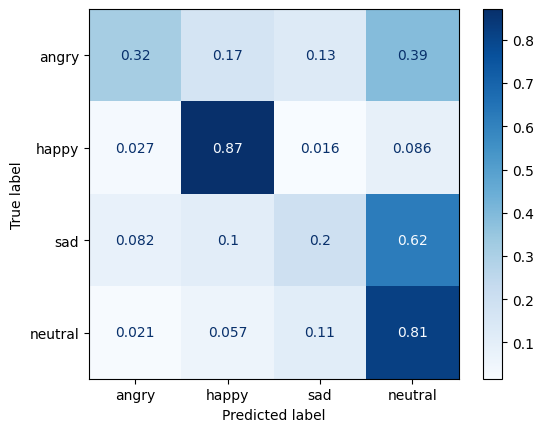

In [35]:
test_pred = best_model.predict(test.drop('emotion', axis=1))

labels = ["angry", "happy", "sad", "neutral"]
cm = confusion_matrix(test["emotion"], test_pred, normalize='true', labels=labels)
dsp = ConfusionMatrixDisplay(cm, display_labels=labels)
dsp.plot(cmap=plt.cm.Blues)
plt.show()

## Repeat without PCA

In [17]:
train_wo_pca = pd.read_csv('train_wo_pca.csv')
test_wo_pca = pd.read_csv('test_wo_pca.csv')

In [18]:
grid_search.fit(train_wo_pca.drop('emotion', axis=1), train_wo_pca['emotion'])

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', SVC())]), n_jobs=-1,
             param_grid=[{'model': [SVC(random_state=42)],
                          'model__C': [0.01, 0.1, 1, 10, 100],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['linear', 'poly', 'rbf']},
                         {'model': [RandomForestClassifier(random_state=42)],
                          'model__criterion': ['gini', 'entropy'],
                          'model__max_depth': [2, 4, 6, 8, 10],
                          'model__max_features': ['sqrt', 'log2'],
                          'model__n_estimators': [10, 100, 1000]}],
             verbose=3)

In [25]:
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values('rank_test_score', inplace=True)
display(results[['params', 'mean_test_score', 'rank_test_score']].head(10))

,params,mean_test_score,rank_test_score
85,{'model': RandomForestClassifier(random_state=...,0.623124,1
88,{'model': RandomForestClassifier(random_state=...,0.623124,1
89,{'model': RandomForestClassifier(random_state=...,0.622050,3
86,{'model': RandomForestClassifier(random_state=...,0.622050,3
46,{'model': RandomForestClassifier(random_state=...,0.621837,5
43,{'model': RandomForestClassifier(random_state=...,0.621837,5
59,{'model': RandomForestClassifier(random_state=...,0.621836,7
56,{'model': RandomForestClassifier(random_state=...,0.621836,7
79,{'model': RandomForestClassifier(random_state=...,0.621623,9
82,{'model': RandomForestClassifier(random_state=...,0.621623,9


In [20]:
print(f"Best parameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_

best_model.fit(train.drop('emotion', axis=1), train['emotion'])

# save the model
pickle.dump(best_model, open('best_model_wo_pca.pkl', 'wb'))

Best parameters: {'model': RandomForestClassifier(random_state=42), 'model__criterion': 'entropy', 'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__n_estimators': 100}


In [ ]:
# load the model
best_model = pickle.load(open('best_model_wo_pca.pkl', 'rb'))

In [21]:
print(f"Train data accuracy: {best_model.score(train.drop('emotion', axis=1), train['emotion'])}")
print(f"Test data accuracy: {best_model.score(test.drop('emotion', axis=1), test['emotion'])}")

print(f"Train data f1-score: {f1_score(train['emotion'], best_model.predict(train.drop('emotion', axis=1)), average='macro')}")
print(f"Test data f1-score: {f1_score(test['emotion'], best_model.predict(test.drop('emotion', axis=1)), average='macro')}")

Train data accuracy: 0.8487773487773488
Test data accuracy: 0.6274131274131274
Train data f1-score: 0.8298601753082652
Test data f1-score: 0.5383043647974105


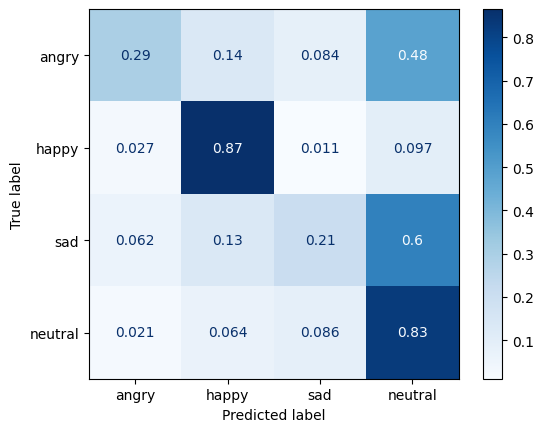

In [22]:
test_pred = best_model.predict(test.drop('emotion', axis=1))

labels = ["angry", "happy", "sad", "neutral"]
cm = confusion_matrix(test["emotion"], test_pred, normalize='true', labels=labels)
dsp = ConfusionMatrixDisplay(cm, display_labels=labels)
dsp.plot(cmap=plt.cm.Blues)
plt.show()